In [1]:
import numpy as np
from scipy.stats import poisson

N, M, RR, MC, G = 20, 5, 10, 2, 0.9
V = np.zeros((N + 1, N + 1))
P = np.zeros((N + 1, N + 1), dtype=int)
L = [3, 4, 3, 2]

def get_dist(lam):
    d = poisson.pmf(np.arange(11), lam)
    d /= d.sum()
    return d

D = [get_dist(l) for l in L]

def get_val_fast(s, a, V):
    res = -MC * abs(a)
    c1, c2 = min(s[0] - a, N), min(s[1] + a, N)
    p_rent = np.outer(D[0], D[1]) 
    p_ret = np.outer(D[2], D[3])
    
    for r1 in range(11):
        for r2 in range(11):
            prob_r = p_rent[r1, r2]
            rr1, rr2 = min(c1, r1), min(c2, r2)
            rew = (rr1 + rr2) * RR
            
            ns1 = np.minimum(np.maximum(c1 - rr1 + np.arange(11)[:, None], 0), N)
            ns2 = np.minimum(np.maximum(c2 - rr2 + np.arange(11)[None, :], 0), N)
            v_sum = np.sum(p_ret * V[ns1, ns2])
            res += prob_r * (rew + G * v_sum)
    return res

stable = False
while not stable:
    while True:
        old_V = V.copy()
        for i in range(N + 1):
            for j in range(N + 1):
                V[i, j] = get_val_fast((i, j), P[i, j], V)
        if np.abs(old_V - V).max() < 1e-4: break
    
    stable = True
    for i in range(N + 1):
        for j in range(N + 1):
            old_a = P[i, j]
            acts = np.arange(-M, M + 1)
            vals = []
            for a in acts:
                if 0 <= i - a <= N and 0 <= j + a <= N:
                    vals.append(get_val_fast((i, j), a, V))
                else: vals.append(-np.inf)
            P[i, j] = acts[np.argmax(vals)]
            if old_a != P[i, j]: stable = False

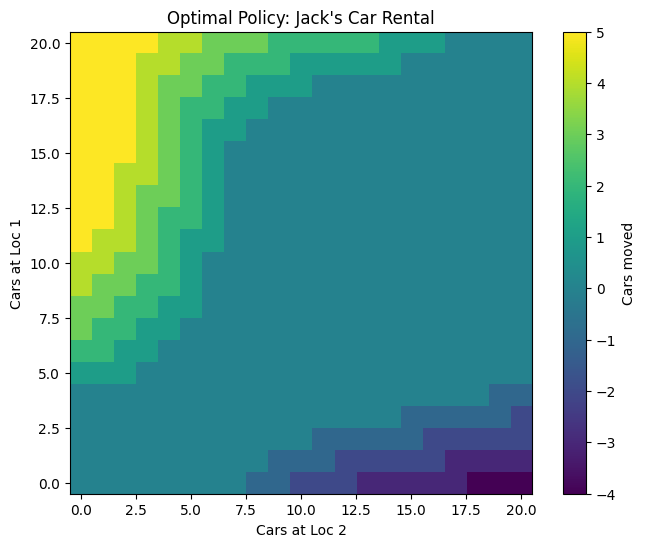

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(P, origin='lower', cmap='viridis')
plt.colorbar(label='Cars moved')
plt.xlabel('Cars at Loc 2')
plt.ylabel('Cars at Loc 1')
plt.title('Optimal Policy: Jack\'s Car Rental')
plt.show()

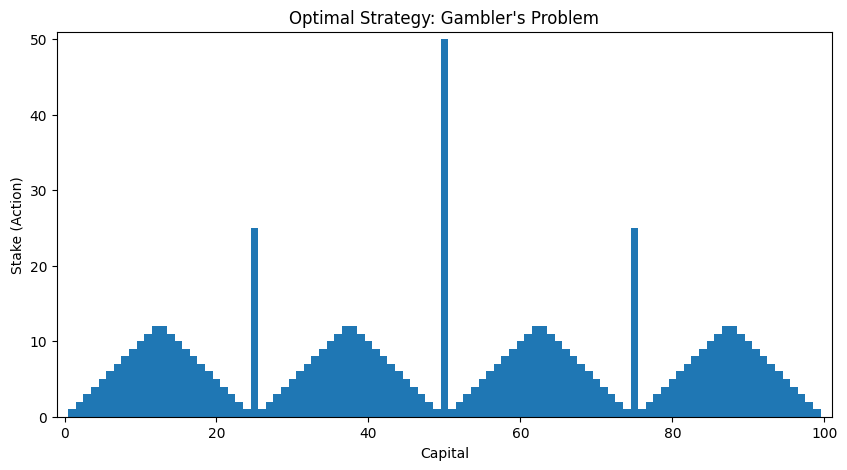

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T, ph = 100, 0.4
V = np.zeros(T + 1)
V[T] = 1.0
P = np.zeros(T + 1)
for _ in range(1000):
    d = 0
    for s in range(1, T):
        ov = V[s]
        A = np.arange(1, min(s, T - s) + 1)
        v_list = [ph * V[s + a] + (1 - ph) * V[s - a] for a in A]
        if v_list:
            V[s] = max(v_list)
            d = max(d, abs(ov - V[s]))
    if d < 1e-9: break
for s in range(1, T):
    A = np.arange(1, min(s, T - s) + 1)
    v_list = [ph * V[s + a] + (1 - ph) * V[s - a] for a in A]
    if v_list:
        P[s] = A[np.argmax(np.round(v_list, 5))]

plt.figure(figsize=(10, 5))
plt.bar(range(T + 1), P, color='tab:blue', width=1.0)
plt.xlabel('Capital')
plt.ylabel('Stake (Action)')
plt.title('Optimal Strategy: Gambler\'s Problem')
plt.xlim(-1, 101)
plt.ylim(0, 51) 
plt.show()